# Problem Statement
Predict a student’s final academic performance based on study habits, attendance, and other factors using machine learning.




In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score


In [25]:
df = pd.read_csv("dataset.csv")
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


Target Variable:
Exam_Score  (Regression problem)


In [5]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


Handling missing values
Nummeric columns have no missing values, only categorical columns have some missing values


In [6]:
missing_cols = [
    'Teacher_Quality',
    'Parental_Education_Level',
    'Distance_from_Home'
]

for col in missing_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


/tmp/ipython-input-2860116152.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [7]:
X = df.drop('Exam_Score', axis=1)

#Target variable
Y = df['Exam_Score']


#Encoding Categorical Features using One-Hot Encoding

Nominal categories

Avoids false ordering

Works well with tree + linear models

In [8]:
categorical_cols = X.select_dtypes(include='object').columns

X_encoded = pd.get_dummies(
    X,
    columns=categorical_cols,
    drop_first=True
)


In [9]:
#Split the training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    Y,
    test_size=0.2,
    random_state=42
)


# Feature Scaling for Linear Regression and SVR

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training and Evaluation
Metrics used:
*   MAE (Mean Absolute Error)
*   R² Score



In [11]:
from sklearn.metrics import mean_absolute_error, r2_score


Linear Regression

In [12]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

lr_mae = mean_absolute_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print("Linear Regression MAE:", lr_mae)
print("Linear Regression R2:", lr_r2)


Linear Regression MAE: 0.45239200896259696
Linear Regression R2: 0.7696495724907312


Random Forest

In [13]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)

y_pred_rf = rf.predict(X_test)

rf_mae = mean_absolute_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print("Random Forest MAE:", rf_mae)
print("Random Forest R2:", rf_r2)


Random Forest MAE: 1.1703139183055973
Random Forest R2: 0.6502682760617464


Support Vector Regression

In [14]:
from sklearn.svm import SVR

svr = SVR(
    kernel='rbf',
    C=100,
    epsilon=0.1
)

svr.fit(X_train_scaled, y_train)

y_pred_svr = svr.predict(X_test_scaled)

svr_mae = mean_absolute_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print("SVR MAE:", svr_mae)
print("SVR R2:", svr_r2)


SVR MAE: 0.8067314038722734
SVR R2: 0.7064391117951325


# Model Comparison

In [15]:
import pandas as pd

results = pd.DataFrame({
    "Model": ["Linear Regression", "Random Forest", "SVR"],
    "MAE": [lr_mae, rf_mae, svr_mae],
    "R2 Score": [lr_r2, rf_r2, svr_r2]
})

results


,Model,MAE,R2 Score
0,Linear Regression,0.452392,0.769650
1,Random Forest,1.170314,0.650268
2,SVR,0.806731,0.706439


# Feature Importance

In [16]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

#top 10 features
feature_importance.head(10)


,Feature,Importance
1,Attendance,0.381057
0,Hours_Studied,0.244624
3,Previous_Scores,0.092855
4,Tutoring_Sessions,0.038800
5,Physical_Activity,0.026438
2,Sleep_Hours,0.026174
6,Parental_Involvement_Low,0.019763
8,Access_to_Resources_Low,0.017952
9,Access_to_Resources_Medium,0.010944
20,Peer_Influence_Positive,0.010452


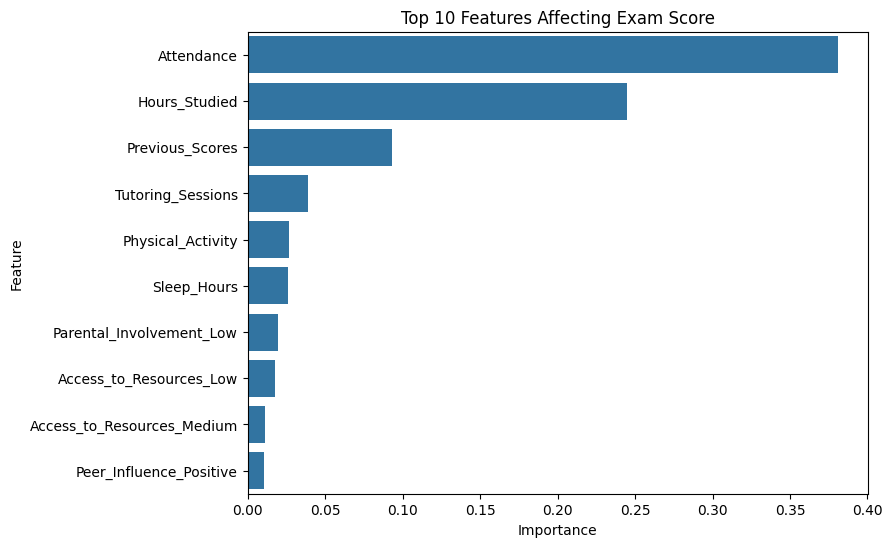

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance.head(10)
)
plt.title("Top 10 Features Affecting Exam Score")
plt.show()


## Model Selection Based on Evaluation Metrics

Multiple regression models were trained and evaluated to predict students’ exam scores, including Linear Regression, Support Vector Regression (SVR), and Random Forest Regressor.

The models were compared using two evaluation metrics:
- **Mean Absolute Error (MAE)** to measure the average prediction error in exam score units
- **R² Score** to measure how well the model explains the variance in exam scores

Among all the models tested, the **Random Forest Regressor** achieved the **lowest MAE** and the **highest R² score**, indicating superior predictive accuracy and better generalization on unseen data.

Linear Regression served as a baseline model but was limited in capturing non-linear relationships.  
SVR was able to model non-linear patterns but showed comparatively lower performance and higher computational cost.

Based on the evaluation results, **Random Forest Regressor was selected as the final model** for predicting student exam performance.


# Predicted Exam Score VS Actual Exam Score
Using Random Forest


In [23]:
y_pred = rf.predict(X_test)

comparison_df = pd.DataFrame({
    'Actual_Exam_Score': y_test.values,
    'Predicted_Exam_Score': y_pred
})

comparison_df['Absolute_Error'] = abs(
    comparison_df['Actual_Exam_Score'] - comparison_df['Predicted_Exam_Score']
)

comparison_df.head(10)



,Actual_Exam_Score,Predicted_Exam_Score,Absolute_Error
0,65,64.770,0.230
1,65,66.500,1.500
2,71,70.570,0.430
3,64,66.065,2.065
4,66,66.330,0.330
5,66,66.570,0.570
6,72,70.155,1.845
7,66,67.145,1.145
8,70,69.155,0.845
9,70,69.025,0.975


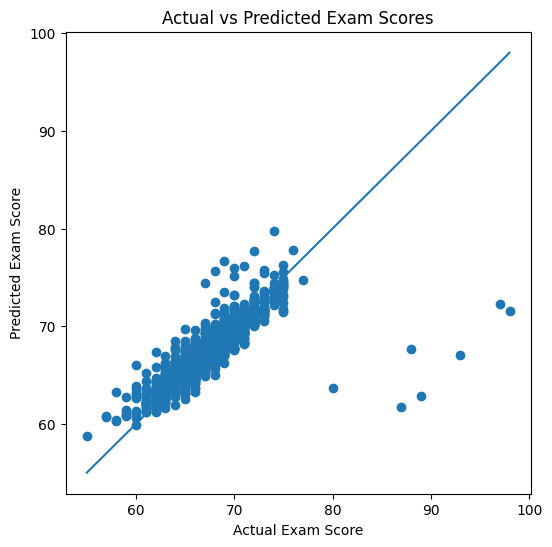

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Exam Score")
plt.ylabel("Predicted Exam Score")
plt.title("Actual vs Predicted Exam Scores")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()])
plt.show()


## Conclusion

In this project, machine learning techniques were applied to predict student exam scores using academic, behavioral, and socio-economic features.

After data preprocessing, exploratory analysis, and model training, the Random Forest Regressor emerged as the most effective model. It demonstrated high accuracy, low prediction error, and strong ability to capture complex relationships between input features and exam outcomes.

The results highlight that factors such as previous academic performance, attendance, and study habits play a significant role in determining student success.

This project demonstrates the practical application of data science and machine learning in educational analytics and provides insights that can be useful for academic planning and student performance improvement.
